In [0]:
# !pip install sklearn-extensions

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import xgboost as xgb
from xgboost import plot_importance
import warnings 
warnings.filterwarnings('ignore')


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Loading the datasets
df_train = pd.read_csv("gdrive/My Drive/520_proj/preFinal/Final/CIS_520_PROJECT_DATA/TRAIN_DATA.csv")
df_test = pd.read_csv("gdrive/My Drive/520_proj/preFinal/Final/CIS_520_PROJECT_DATA/VALIDATION_DATA.csv")
df_val = pd.read_csv("gdrive/My Drive/520_proj/preFinal/Final/CIS_520_PROJECT_DATA/UNSEEN_TESTING_DATA.csv")

In [0]:

df_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,commentID,createDate,articleWordCount,depth,recommendations,replyCount,userIDRC,editorsSelection,ratio_comment_article,word_count,comment,reporterReply,userReply,0_LDA,1_LDA,2_LDA,3_LDA,4_LDA,5_LDA,6_LDA,7_LDA,8_LDA,9_LDA,10_LDA,11_LDA,12_LDA,13_LDA,14_LDA,15_LDA,16_LDA,17_LDA,18_LDA,19_LDA,articleID,articleRelevance,Sentiment
0,0.082981,-0.097531,-0.022281,0.035595,0.002903,0.008946,-0.004116,0.016800,0.004000,-0.054189,0.077229,0.077173,-0.018401,0.005129,0.002620,-0.020919,0.067789,0.031618,0.013293,0.029003,-0.029955,0.036427,0.005118,-0.010949,-0.030049,0.014499,0.025284,0.013931,0.008188,-0.000378,21059310.0,9070.0,1254.0,1.0,17.0,0.0,0.000000,0.0,592.00000,327.0,1.0,0.0,0.0,0.015234,0.000000,0.001474,0.002076,0.000541,0.012121,0.006296,0.000000,0.000510,0.000000,0.000000,0.000207,0.108492,0.0,0.000400,0.000469,0.000320,0.000157,0.000000,0.001834,587575d295d0e0392607a033,0.035309,0.4767
1,0.080163,0.047493,-0.014904,0.005567,-0.004679,-0.010961,-0.000744,-0.006526,0.057172,0.030394,-0.031720,-0.003787,-0.021565,0.002246,0.014513,0.046155,0.060575,-0.040848,-0.047009,0.062050,0.005777,-0.013676,0.031962,0.024183,0.042047,0.013725,0.052387,0.009911,-0.017457,-0.009532,20991167.0,52691.0,1233.0,2.0,3.0,0.0,44.684211,0.0,12.52381,149.0,0.0,0.0,1.0,0.000000,0.000655,0.002676,0.000213,0.004868,0.000209,0.000000,0.000562,0.038849,0.001519,0.000933,0.003135,0.000254,0.0,0.001058,0.000990,0.001085,0.000253,0.000428,0.019422,586d000995d0e03926078eb2,-0.071916,0.8176


In [0]:
y=df_train['recommendations']
X=df_train.drop(['recommendations','articleID','commentID'],axis=1)

y_test=df_test['recommendations']
X_test=df_test.drop(['recommendations','articleID','commentID'],axis=1)

y_val=df_val['recommendations']
X_val=df_val.drop(['recommendations','articleID','commentID'],axis=1)


In [0]:
yc = (y>3)*1
yc_test = (y_test>3)*1
yc_val=(y_val>3)*1

In [0]:
y = np.log(y+1)
y_test = np.log(y_test+1)
y_val=np.log(y_val+1)

### Baseline results

In [0]:
print("train_baseline", mean_absolute_error(np.log(4)*np.ones(len(y)),y))
print("test_baseline", mean_absolute_error(np.log(4)*np.ones(len(y_test)),y_test))
print("val_baseline", mean_absolute_error(np.log(4)*np.ones(len(y_val)),y_val))

train_baseline 1.0339134991386294
test_baseline 1.0423609445633808
val_baseline 1.0331021099138706


### Polynomial Regression of Degree 2

In [0]:

poly= PolynomialFeatures(degree = 2)
lr=LinearRegression()
poly.fit(X)
Xset=poly.transform(X)

lr.fit(Xset,y)
y_pred_train=lr.predict(Xset) 

Xset_test=poly.transform(X_test)
y_pred_test=lr.predict(Xset_test) 


In [0]:
print("train polynomial regression deg 2", mean_absolute_error(y_pred_train,y))
print("test_polynomial regression deg 2", mean_absolute_error(y_pred_test,y_test))

train polynomial regression deg 2 0.8634768758011226
test_polynomial regression deg 2 0.9131437052565387


######Lasso Regression

In [0]:

poly= PolynomialFeatures(degree = 2)
lr=Lasso(selection='random')
poly.fit(X)
Xset=poly.transform(X)

lr.fit(Xset,y)
y_pred_train=lr.predict(Xset) 

Xset_test=poly.transform(X_test)
y_pred_test=lr.predict(Xset_test) 


In [0]:
print("train polynomial regression deg 2", mean_absolute_error(y_pred_train,y))
print("test_polynomial regression deg 2", mean_absolute_error(y_pred_test,y_test))


train polynomial regression deg 2 0.9132701185062434
test_polynomial regression deg 2 0.9441814187502625


In [0]:
poly= PolynomialFeatures(degree = 2)
lr=ElasticNet()
poly.fit(X)
Xset=poly.transform(X)

lr.fit(Xset,y)
y_pred_train=lr.predict(Xset) 

Xset_test=poly.transform(X_test)
y_pred_test=lr.predict(Xset_test) 


In [0]:
print("train polynomial regression deg 2", mean_absolute_error(y_pred_train,y))
print("test_polynomial regression deg 2", mean_absolute_error(y_pred_test,y_test))


train polynomial regression deg 2 0.909878177616495
test_polynomial regression deg 2 0.9424973977609978


###### Thus, the results were the best for the polynomial regression without any penalty. This was probably because the model was very simple and thus, regularization only degraded the model.

#### Ensembling:
Creating 2-step Model:
Converting the given problem to Classification by predicting 0 and 1 based on the median ( 0 being lower than the median and 1 being greater than it). Next we apply regression on the two classes to predict the actual log of recommendation values.

We have used Random forest Classifier for the Binary Classifcation and Random Forest Regressor for further predicting log(recommendation) values 

In [0]:
param_grid = {
    'max_depth': [20, 50, 80],
    'max_features': [None, 'log2'],
    'n_estimators': [50, 100]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 10)

In [0]:
grid_search.fit(X, yc)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed: 57.9min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 65.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
grid_search.best_params_

{'max_depth': 20, 'max_features': None, 'n_estimators': 100}

In [0]:
# rf=RandomForestClassifier(max_depth=50, max_leaf_nodes=50,n_estimators=50)
# grid_search.fit(X,yc)

In [0]:
X['classified']=grid_search.predict(X)
X_test['classified']=grid_search.predict(X_test)
# X_val['classified']=rf.predict(X_val)

In [0]:
X1 = X[X['classified']==1]
X0 = X[X['classified']==0]
X1_test = X_test[X_test['classified']==1]
X0_test = X_test[X_test['classified']==0]
y1 = y[X['classified']==1]
y0 = y[X['classified']==0]
y1_test = y_test[X_test['classified']==1]
y0_test = y_test[X_test['classified']==0]


# X1_val = X_val[X_val['classified']==1]
# X0_val = X_val[X_val['classified']==0]
# y1_val = y_val[X_val['classified']==1]
# y0_val = y_val[X_val['classified']==0]


In [0]:
param_grid = {
    'max_depth': [20, 50, 80],
    'max_features': [None, 'log2'],
    'n_estimators': [50, 100]
}# Create a based mode
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search_reg1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_reg1.fit(X1,y1)
# rf1= RandomForestRegressor(max_depth=50,1 max_leaf_nodes=50,n_estimators=50)
# rf1.fit(X1,y1)
y1_pred = grid_search_reg1.predict(X1_test)
# y1_val_pred=grid_search_reg1.predict(X1_val)
mae1 = mean_absolute_error(y1_pred,y1_test)
# mae1_val = mean_absolute_error(y1_val_pred,y1_val)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 31.6min finished


In [0]:
grid_search_reg1.best_params_

{'max_depth': 20, 'max_features': None, 'n_estimators': 100}

In [0]:
param_grid = {
    'max_depth': [20, 50, 80],
    'max_features': [None, 'log2'],
    'n_estimators': [50, 100]
}# Create a based mode
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search_reg0 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_reg0.fit(X0,y0)
rf0= RandomForestRegressor(max_depth=50, max_leaf_nodes=50,n_estimators=50)
grid_search_reg0.fit(X0,y0)
y0_pred = grid_search_reg0.predict(X0_test)
# y0_val_pred=grid_search_reg0.predict(X0_val)
mae0 = mean_absolute_error(y0_pred,y0_test)
# mae0_val = mean_absolute_error(y0_val_pred,y0_val)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 28.9min finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 29.0min finished


In [0]:
mae_net_test=(y1_test.shape[0]*mae1 + y0_test.shape[0]*mae0)/(y1_test.shape[0] + y0_test.shape[0])
mae_net_test

0.9748516788402078

#### XGBoost Regressor

In [0]:
XGB_=xgb.XGBRegressor(max_depth= 10, eta= 0.4,eval_metric='mae',subsample=0.5)

eval_set = [(X, y), (X_test, y_test)]
XGB_.fit(X, y, early_stopping_rounds=5, eval_metric=['mae'], eval_set=eval_set, verbose=True)

[03:04:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:1.27134	validation_1-mae:1.27327
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:1.19019	validation_1-mae:1.20179
[2]	validation_0-mae:1.12506	validation_1-mae:1.14406
[3]	validation_0-mae:1.06858	validation_1-mae:1.0952
[4]	validation_0-mae:1.01978	validation_1-mae:1.05336
[5]	validation_0-mae:0.979355	validation_1-mae:1.01934
[6]	validation_0-mae:0.945498	validation_1-mae:0.994612
[7]	validation_0-mae:0.917291	validation_1-mae:0.972209
[8]	validation_0-mae:0.894258	validation_1-mae:0.953545
[9]	validation_0-mae:0.874013	validation_1-mae:0.938897
[10]	validation_0-mae:0.85695	validation_1-mae:0.926289
[11]	validation_0-mae:0.842533	validation_1-mae:0.917073
[12]	validation_0-mae:0.830792	validation_1-mae:0.908925

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4, eval_metric='mae',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)

In [0]:
ypred = XGB_.predict(X_test)
mean_absolute_error(ypred,y_test)

0.8787174779038688

In [0]:
ypred = XGB_.predict(X_val)
mean_absolute_error(ypred,y_val)

0.8641138109046761

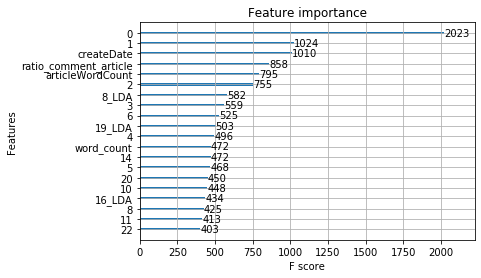

In [0]:

plot_importance(XGB_,height = 0.2,max_num_features=20)

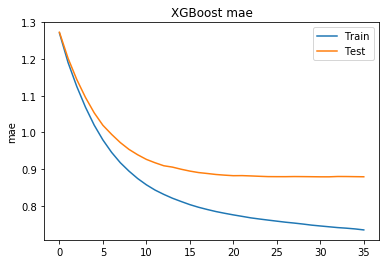

In [0]:
from matplotlib import pyplot
results = XGB_.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('mae')
pyplot.title('XGBoost mae')
pyplot.show()
